# Data Exploration

In [276]:
library(tidyverse)
library(corrplot)
library(ggplot2)
library(reshape2)
install.packages("corrplot")
install.packages("xgboost")
library(caret)
library(xgboost)
library(randomForest)
library(glmnet)

In [277]:
train <- read_csv('train.csv')
test <- read_csv('test.csv')

Rows: 1460 Columns: 81
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1459 Columns: 80
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (37): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [278]:
y_train <- train$SalePrice
train$SalePrice <- NULL
data <- bind_rows(train, test)

In [279]:
str(data)

spc_tbl_ [2,919 × 80] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id           : num [1:2919] 1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : num [1:2919] 60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr [1:2919] "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : num [1:2919] 65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : num [1:2919] 8450 9600 11250 9550 14260 ...
 $ Street       : chr [1:2919] "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr [1:2919] NA NA NA NA ...
 $ LotShape     : chr [1:2919] "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr [1:2919] "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr [1:2919] "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr [1:2919] "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr [1:2919] "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr [1:2919] "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr [1:2919] "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr [1:2919] "Norm" "Norm" "Norm" "Norm" ...
 $ Bld

In [280]:
# Create a summary data frame
summary_df <- data %>%
  summary() %>%
  as.data.frame()

# Display the transposed summary data frame
summary_df

Var1,Var2,Freq
<fct>,<fct>,<chr>
,Id,Min. : 1.0
,Id,1st Qu.: 730.5
,Id,Median :1460.0
,Id,Mean :1460.0
,Id,3rd Qu.:2189.5
,Id,Max. :2919.0
,Id,NA
,MSSubClass,Min. : 20.00
,MSSubClass,1st Qu.: 20.00


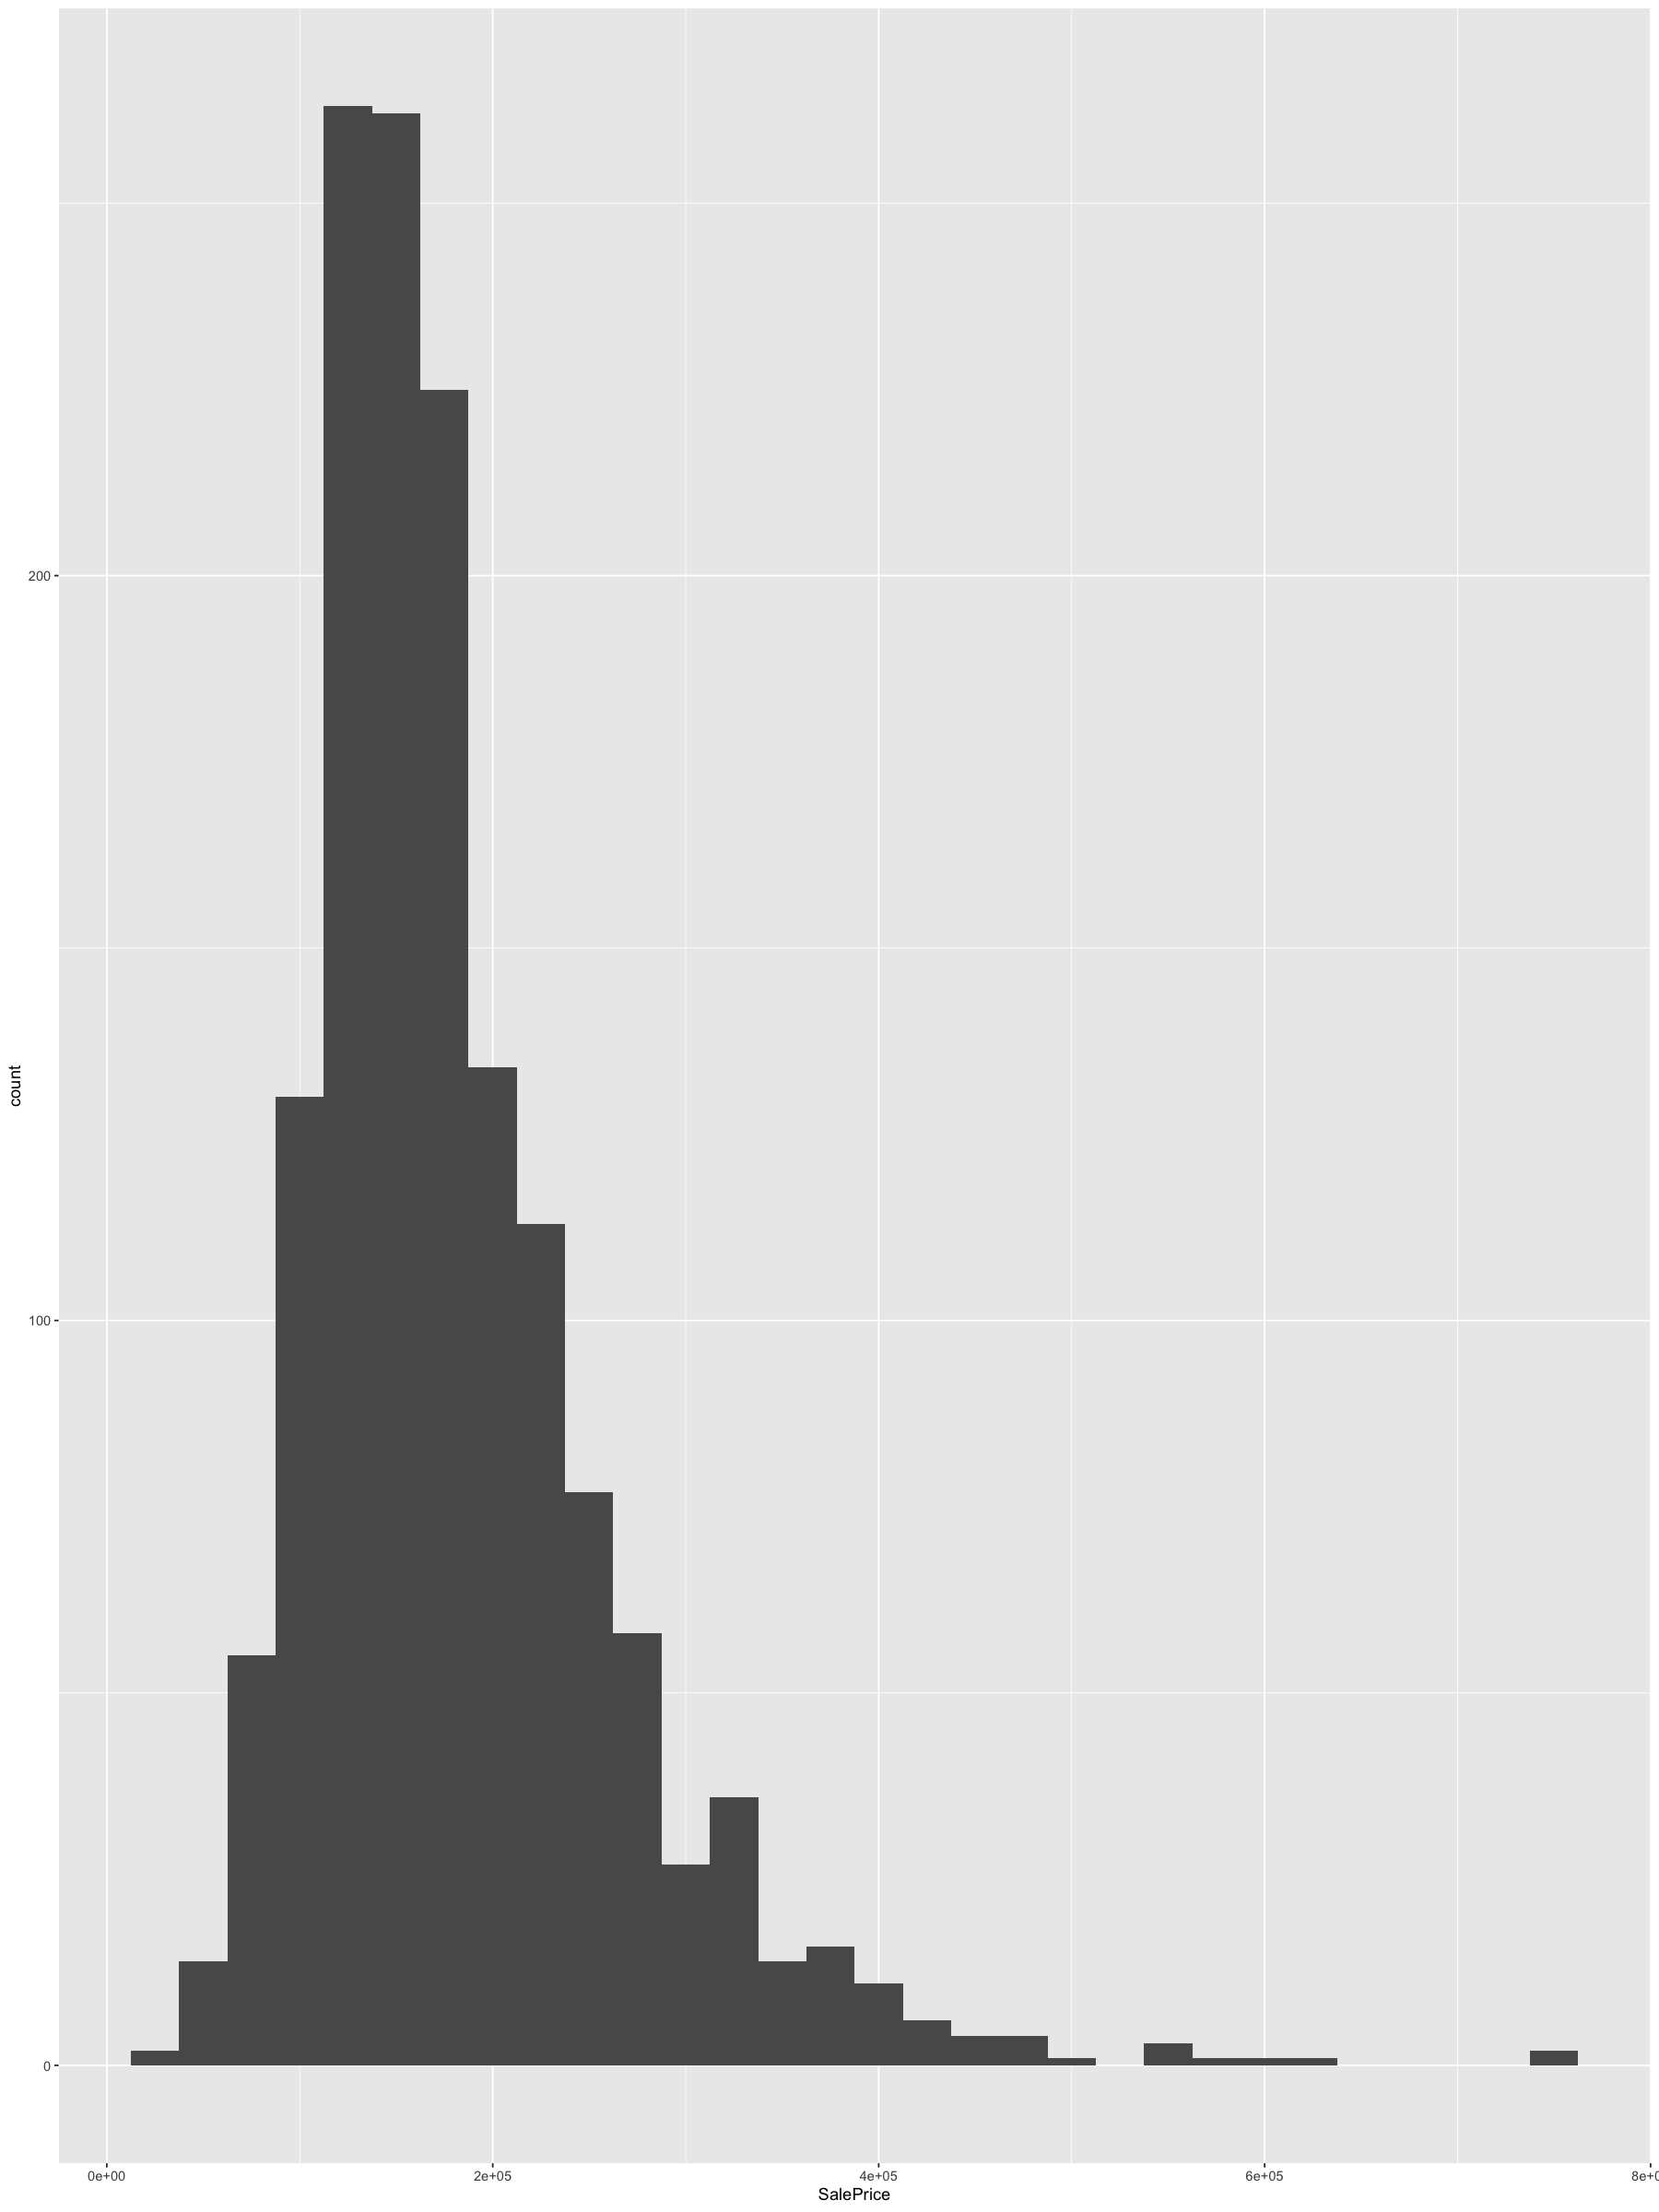

In [282]:
ggplot(train, aes(x = SalePrice)) +
  geom_histogram(binwidth = 25000)

In [283]:
numeric_data <- train %>%
  select_if(is.numeric)

In [284]:
data_long <- numeric_data %>%
  gather(key = "variable", value = "value") %>%
  drop_na(value)

data_long$variable <- factor(data_long$variable, levels = names(data))

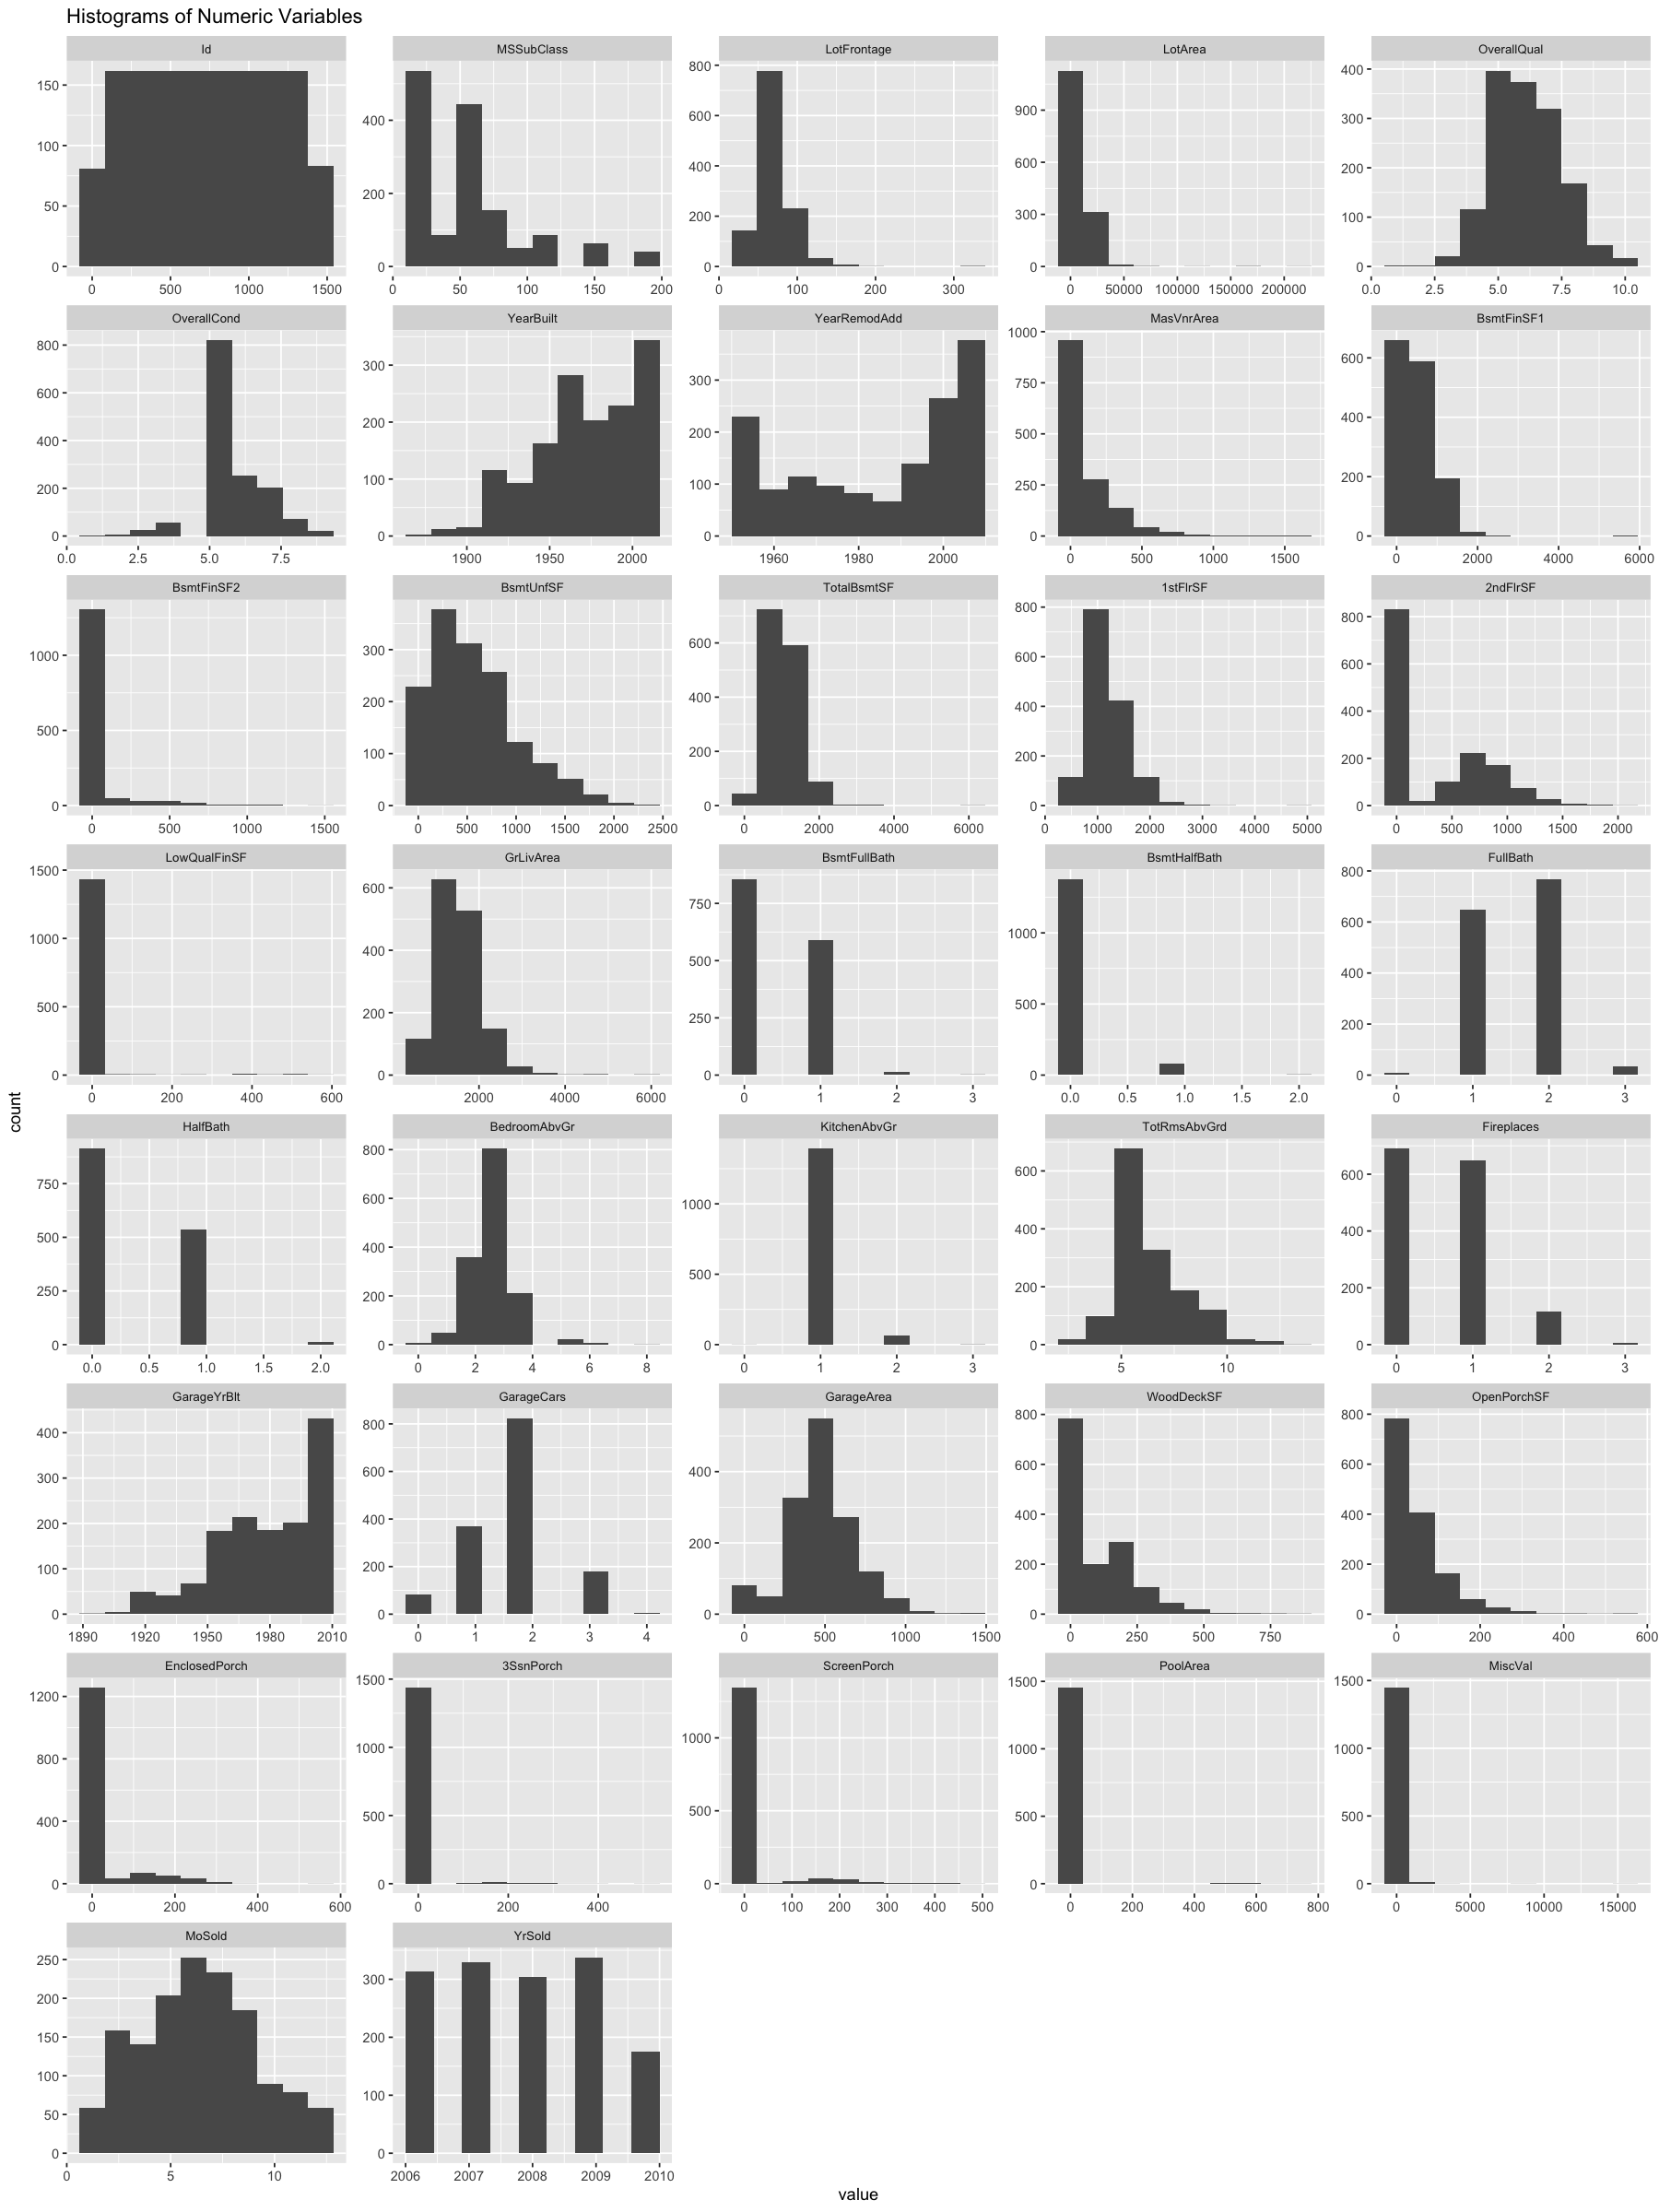

In [285]:
plot <- ggplot(data_long, aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~ variable, scales = "free", ncol = 5) +
  theme(strip.text.x = element_text(size = 8)) +
  ggtitle("Histograms of Numeric Variables")

options(repr.plot.width = 15, repr.plot.height = 20)

print(plot)

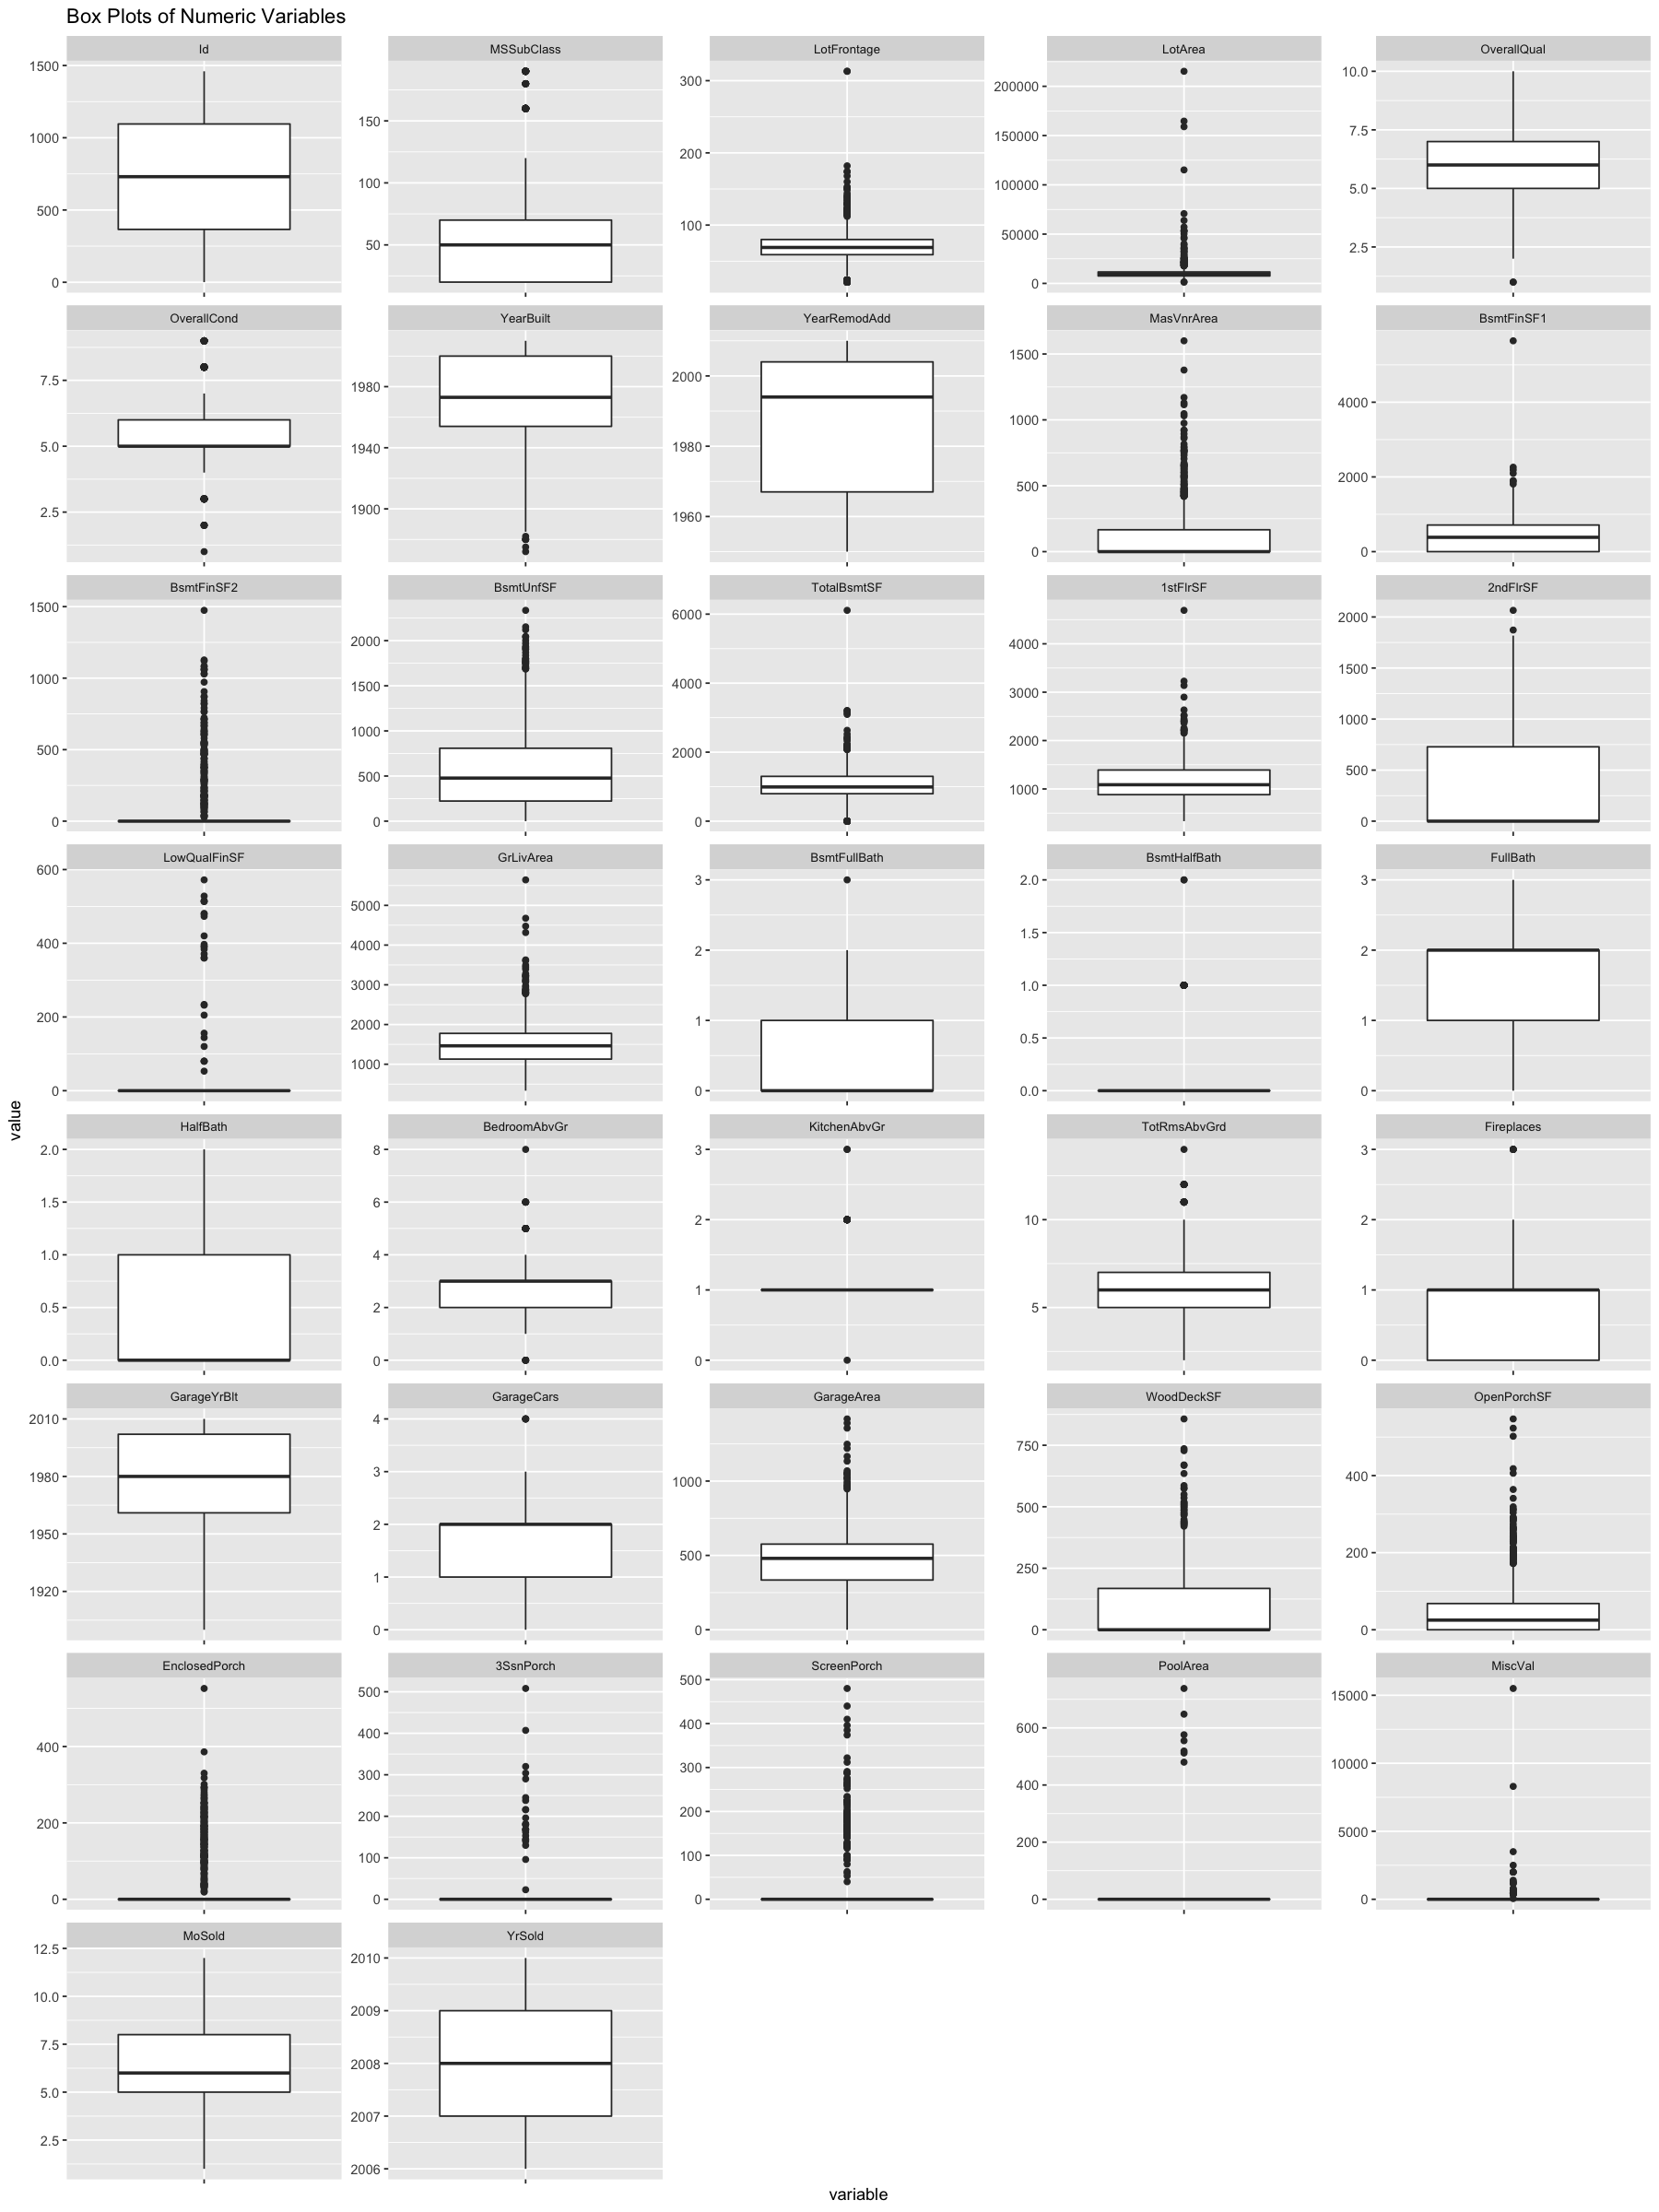

In [286]:
plot <- ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  facet_wrap(~ variable, scales = "free", ncol = 5) +
  theme(strip.text.x = element_text(size = 8),
        axis.text.x = element_blank()) +
  ggtitle("Box Plots of Numeric Variables")

# Increase the plot size
options(repr.plot.width = 15, repr.plot.height = 20)

# Print the plot
print(plot)

In [293]:
train_c <- train
train_c$SalePrice = y_train

Warning message:
“Removed 3 rows containing missing values (position_stack).”


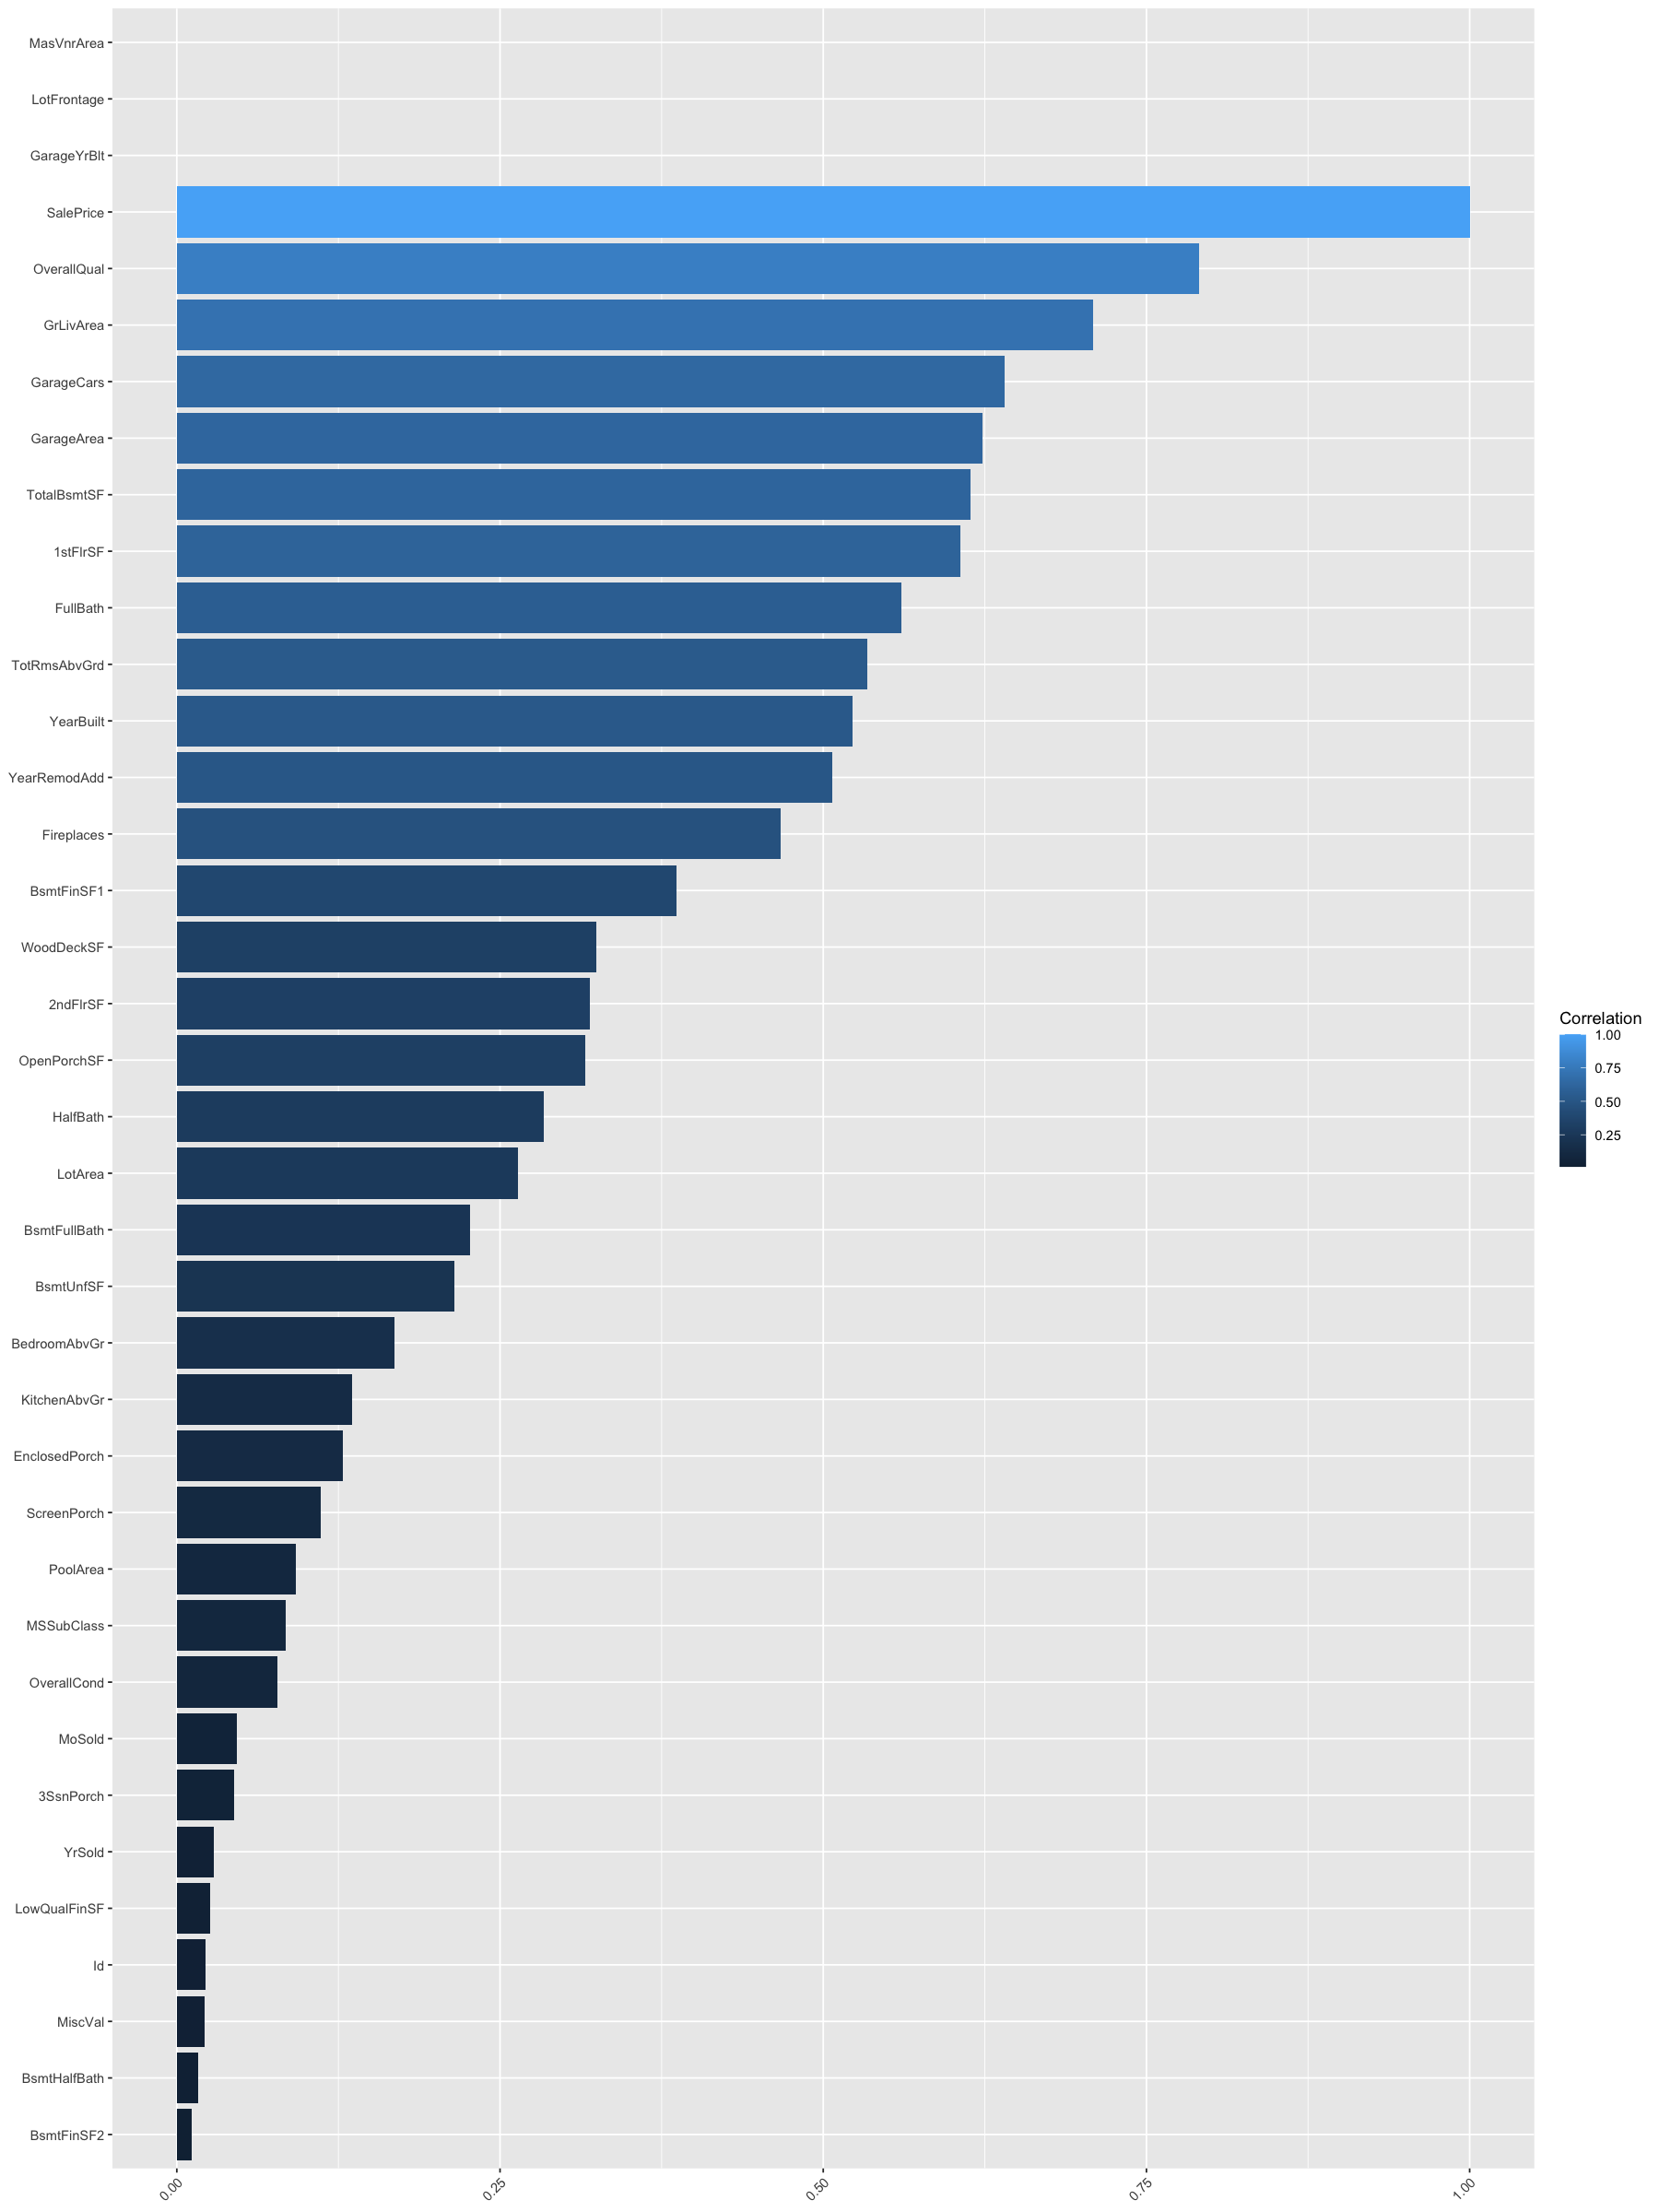

In [296]:
high_correlated_cols <- function(data, plot = FALSE, corr_th = 0.75) {
  num_cols <- sapply(data, is.numeric)
  corr <- cor(data[, num_cols])
  cor_matrix <- abs(corr)
  upper_triangle_matrix <- cor_matrix * upper.tri(cor_matrix)
  
  if (plot) {
    saleprice_corr <- cor_matrix["SalePrice", ]
    corr_df <- data.frame(Column = names(saleprice_corr), Correlation = saleprice_corr)
    
    ggplot(data = corr_df, aes(x = reorder(Column, Correlation), y = Correlation, fill = Correlation)) +
      geom_bar(stat = "identity") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1),
            axis.title.x = element_blank(),
            axis.title.y = element_blank()) +
      labs(fill = "Correlation", x = "Column", y = "Correlation with SalePrice") +
      coord_flip()
  }
}

# Call the function with the updated dataset
high_correlated_cols(train_c, plot = TRUE)

# Understanding the Problem

Goals: Predict the SalePrice of a house using Advanced Regression techniques

- We are not competing with other teams on kaggle
- This project is a playground to practice the knowledge of this class and prepare for the final exam.
- Group project, 1-3 people per team. You can be your own team. **We are 4 teammates and have an exception from the professor**
- You can use R or Python
- Build one prediction model using the ML algorithms of this course
- Evaluate your prediction model
- Try different ways to improve your model and show the improvements.
- Submit code and results in Jupyter and HTML formats on canvas

## Picking some based on current understanding of real estate data:
Level 0:
- MoSold, YrSold, LotArea, BedroomAbvGr
<br>

Level 1:
- LotArea, OverallQual, YearBuilt, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, 

Level 2:
- Numerical: LotArea, OverallQual, OverallCond, YearBuilt --> Convert to Age, TotalBsmtSF, GrLivArea, FullBath, TotRmsAbvGrd, KitchenAbvGr, Functional, GarageCars, PavedDrive, WoodDeckSF, OpenPorchSF, PoolArea, SaleCondition, BedroomAbvGr

<br>
Level 3:

- Clustering: Street, Neighborhood, Condition1, BldfType, YearRemodAdd --> Convert to Age, RoofStyle, Exterior1st, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, BsmtFullBath, BsmtHalfBath, HalfBath, GarageType, GarageYrBlt, GarageFinish, GarageArea, EnclosedPorch, PoolQC, Fence, MoSold, YrSold, SaleType
<br>

Level 4:
- Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Condition2, RoofMatl, Exterior2nd, MasVnrType, MasVnrArea, BsmtFinSF2, BsmtUnfSF, LowQualFinSF, KitchenQual, Fireplaces, FireplaceQu, GarageQual, GarageCond, 3SsnPorch, ScreenPorch, MiscFeature, MiscVal


In [297]:
#prepare data
train <- data[1:length(y_train), ]
test <- data[(length(y_train) + 1):length(data), ]

In [298]:
train$SalePrice = y_train
test$SalePrice = NA

In [299]:
head(train)
head(test)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,NA
1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,6,2008,WD,Normal,NA
1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,NA
1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,NA
1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,MnPrv,NA,0,2,2010,WD,Normal,NA
1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,8,2007,WD,Normal,NA


# Level 0 Models:

In [300]:
df = subset(train, select = c(MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice))

In [301]:
summary(df)

     MoSold           YrSold        LotArea        BedroomAbvGr  
 Min.   : 1.000   Min.   :2006   Min.   :  1300   Min.   :0.000  
 1st Qu.: 5.000   1st Qu.:2007   1st Qu.:  7554   1st Qu.:2.000  
 Median : 6.000   Median :2008   Median :  9478   Median :3.000  
 Mean   : 6.322   Mean   :2008   Mean   : 10517   Mean   :2.866  
 3rd Qu.: 8.000   3rd Qu.:2009   3rd Qu.: 11602   3rd Qu.:3.000  
 Max.   :12.000   Max.   :2010   Max.   :215245   Max.   :8.000  
   SalePrice     
 Min.   : 34900  
 1st Qu.:129975  
 Median :163000  
 Mean   :180921  
 3rd Qu.:214000  
 Max.   :755000  

In [302]:
col_counts <- colSums(!is.na(df))
print(col_counts)

      MoSold       YrSold      LotArea BedroomAbvGr    SalePrice 
        1460         1460         1460         1460         1460 


In [303]:
head(df)

MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2008,8450,3,208500
5,2007,9600,3,181500
9,2008,11250,3,223500
2,2006,9550,3,140000
12,2008,14260,4,250000
10,2009,14115,1,143000


In [304]:
head(test)
count(test)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,NA
1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,6,2008,WD,Normal,NA
1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,NA
1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,NA
1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,MnPrv,NA,0,2,2010,WD,Normal,NA
1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,8,2007,WD,Normal,NA


n
<int>
1382


In [305]:
#using linear regression
model_test <- train(SalePrice ~ ., data = df, method = "lm")

In [306]:
predictions_test <- predict(model_test, newdata = test)

In [307]:
df_test$SalePrice = predictions_test
head(df_test)

MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2010,11622,2,169277.1
6,2008,9937,3,181032.1
4,2010,9717,2,163318.2
5,2010,9042,4,189646.4
2,2010,13175,3,181189.7
8,2007,7917,3,180164.2


In [308]:
#using xboost

In [309]:
model_test <- train(SalePrice ~ ., data = df, method = "xgbTree", tuneLength = 3)

[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:56:25] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

In [310]:
predictions_test <- predict(model_test, newdata = test)

In [311]:
df_test$SalePrice = predictions_test
head(df_test)

MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2010,11622,2,197762.6
6,2008,9937,3,172009.4
4,2010,9717,2,170691.9
5,2010,9042,4,177333.7
2,2010,13175,3,220763.1
8,2007,7917,3,153552.3


In [312]:
#using random forest tree

In [313]:
model_test <- train(SalePrice ~ ., data = df, method = "rf", tuneLength = 3)

In [314]:
predictions_test <- predict(model_test, newdata = test)
df_test$SalePrice = predictions_test
head(df_test)

MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2010,11622,2,175263.6
6,2008,9937,3,170007.8
4,2010,9717,2,138740.4
5,2010,9042,4,207122.1
2,2010,13175,3,236706.3
8,2007,7917,3,159967.1


In [315]:
#using LASSO regression

In [316]:
model_test <- train(SalePrice ~ ., data = df, method = "glmnet", tuneGrid = expand.grid(alpha = 0, lambda = seq(0.001, 1, length = 10)))

In [317]:
predictions_test <- predict(model_test, newdata = test)
df_test$SalePrice = predictions_test
head(df_test)

MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2010,11622,2,169476.3
6,2008,9937,3,181032.8
4,2010,9717,2,163657.1
5,2010,9042,4,189455.9
2,2010,13175,3,181142.1
8,2007,7917,3,180208.2


# Data Processing for Char Columns - 